<a href="https://colab.research.google.com/github/Parths131/daily-forecasting/blob/main/sunday_dep_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving only-sunday-data.csv to only-sunday-data.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
from datetime import timedelta
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
path = '/content/only-sunday-data.csv'
df = pd.read_csv(path)

In [ ]:
df

,Date,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,03-02-2019,943,1019,527,1415,1282,3057.0,2847,2415,2370,...,1524.0,2508.0,1767,1960,2162,2440,2297,2097,1724,1626
1,10-02-2019,1178,787,1229,925,1681,2886.0,3292,2216,1918,...,1818.0,2498.0,1781,2078,1824,2357,2444,3177,2152,1784
2,17-02-2019,1204,579,810,1445,1329,3746.0,3015,2209,2199,...,NaN,NaN,1609,1315,2290,2951,3115,1917,2877,1340
3,24-02-2019,1879,751,961,1181,1323,3262.0,2350,2353,3258,...,NaN,NaN,1207,1414,2856,2751,2770,2853,1652,1994
4,03-03-2019,1168,698,914,1173,1314,3035.0,3296,2443,2326,...,1635.0,2267.0,2064,1398,1890,1988,2480,2229,1907,1691
5,10-03-2019,707,1018,342,1373,1332,3086.0,3279,2079,2596,...,1827.0,2806.0,1440,1694,1659,2684,2560,2337,1985,1763
6,17-03-2019,1189,452,866,1163,1560,3283.0,3212,2370,1893,...,1910.0,2446.0,1515,1731,1943,3118,1971,1872,1834,1592
7,24-03-2019,771,607,877,823,1423,3733.0,2951,2052,2335,...,1861.0,2301.0,2193,1239,2062,2587,1990,2179,1888,1971
8,31-03-2019,2372,868,1730,2626,1412,5856.0,6740,5816,4194,...,4180.0,4360.0,3906,3038,3888,4474,4298,4688,2366,3352
9,07-04-2019,1629,1096,300,1361,1106,3041.0,3487,2221,2218,...,1829.0,2416.0,1718,1609,2472,2166,1948,1609,1774,1461


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
df.reset_index(inplace=True)

long_data = df.melt(id_vars=['Date'], var_name='Hour', value_name='Passengers')

long_data['Hour'] = pd.to_numeric(long_data['Hour'])

long_data = long_data.sort_values(by=['Date', 'Hour'])

long_data.reset_index(drop=True, inplace=True)

print(long_data)

           Date  Hour  Passengers
0    2019-02-03     0       943.0
1    2019-02-03     1      1019.0
2    2019-02-03     2       527.0
3    2019-02-03     3      1415.0
4    2019-02-03     4      1282.0
...         ...   ...         ...
1147 2019-12-29    19      2565.0
1148 2019-12-29    20      1886.0
1149 2019-12-29    21      2263.0
1150 2019-12-29    22      1210.0
1151 2019-12-29    23      1782.0

[1152 rows x 3 columns]


In [ ]:
long_data.fillna(0, inplace=True)

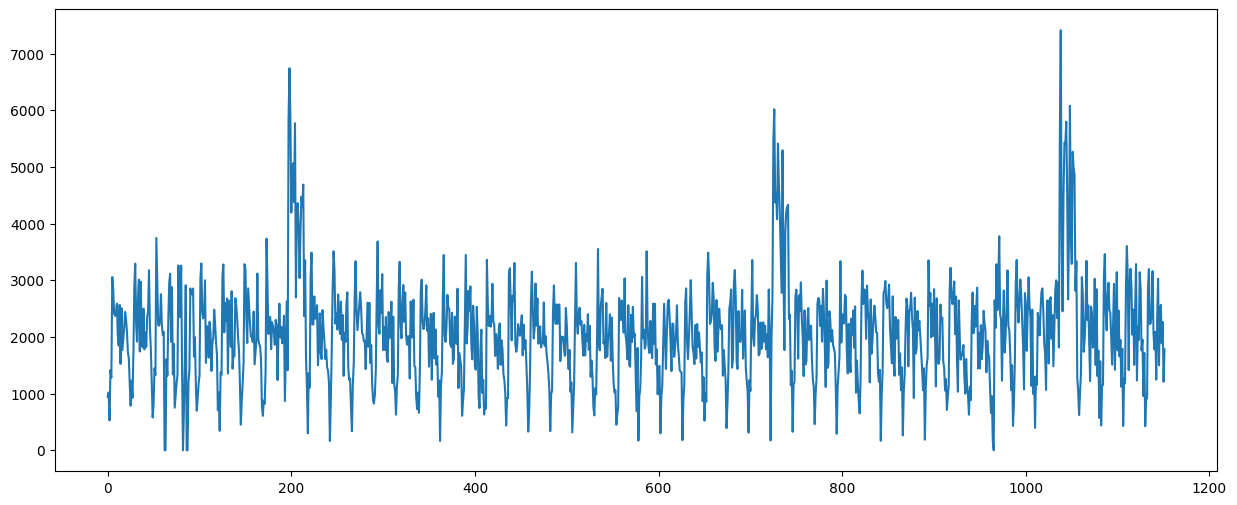

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(long_data['Passengers'])

In [ ]:
long_data

,Date,Hour,Passengers
0,2019-02-03,0,943.0
1,2019-02-03,1,1019.0
2,2019-02-03,2,527.0
3,2019-02-03,3,1415.0
4,2019-02-03,4,1282.0
...,...,...,...
1147,2019-12-29,19,2565.0
1148,2019-12-29,20,1886.0
1149,2019-12-29,21,2263.0
1150,2019-12-29,22,1210.0


In [ ]:
adf_test = adfuller(long_data['Passengers'].diff(12).dropna())

print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

ADF Statistic: -8.759044849731879
p-value: 2.7054008252547053e-14


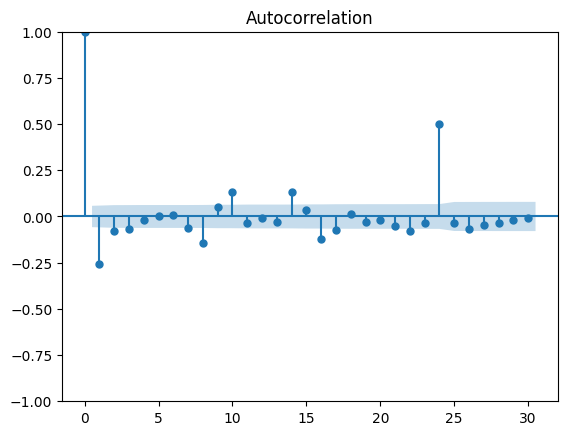

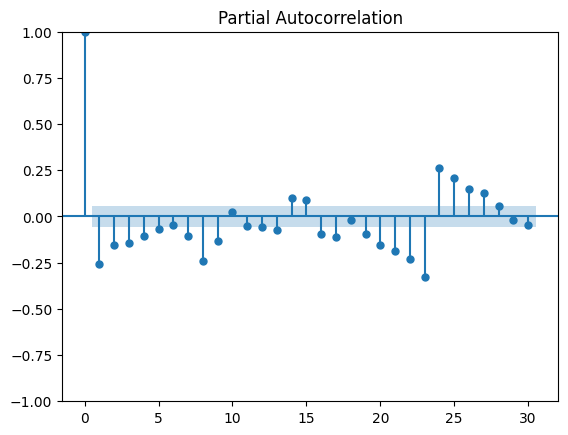

In [ ]:
acf_original = plot_acf(long_data['Passengers'].diff().dropna(), lags=30)

pacf_original = plot_pacf(long_data['Passengers'].diff().dropna(), lags=30)

In [ ]:
order = (2,0,2)
seasonal_order = (3,1,1,24)

In [ ]:
df_train = long_data.iloc[:1060]
df_test = long_data.iloc[1060:]

In [ ]:
df_test

,Date,Hour,Passengers
1060,2019-12-08,4,1346.0
1061,2019-12-08,5,3055.0
1062,2019-12-08,6,2748.0
1063,2019-12-08,7,1737.0
1064,2019-12-08,8,1953.0
...,...,...,...
1147,2019-12-29,19,2565.0
1148,2019-12-29,20,1886.0
1149,2019-12-29,21,2263.0
1150,2019-12-29,22,1210.0


In [ ]:
start_date = '2019-12-08 04:00:00'
end_date = '2019-12-29 23:00:00'

all_hours = pd.date_range(start=start_date, end=end_date, freq='H')

sundays = all_hours[all_hours.weekday == 6]

model = SARIMAX(df_train['Passengers'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

testing = model_fit.forecast(len(sundays))

testing_df = pd.DataFrame({'Date': sundays.date, 'Hour': sundays.hour, 'Passengers': testing})

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
rmse = np.sqrt(np.mean((df_test['Passengers'] - testing_df['Passengers']) ** 2))

mae = np.mean(np.abs(df_test['Passengers'] - testing_df['Passengers']))

rmse, mae

(397.95689510581786, 313.301041392548)

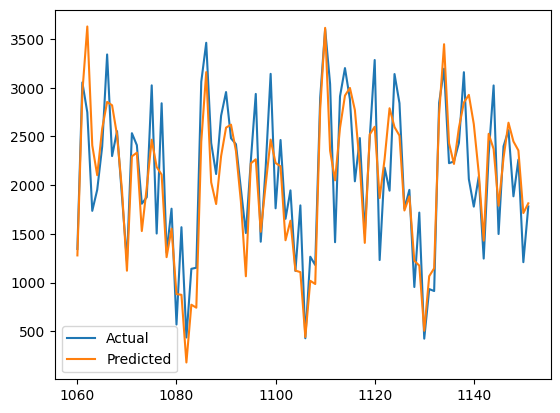

In [ ]:
plt.plot(df_test['Passengers'], label='Actual')
plt.plot(testing_df['Passengers'], label='Predicted')
#plt.plot(long_data['Passengers'][600:], label='Predicted')
plt.legend()

In [ ]:
testing_df

,Date,Hour,Passengers
1060,2019-12-08,4,1279.486106
1061,2019-12-08,5,2953.182168
1062,2019-12-08,6,3629.224458
1063,2019-12-08,7,2409.320307
1064,2019-12-08,8,2102.537843
...,...,...,...
1147,2019-12-29,19,2641.579531
1148,2019-12-29,20,2449.273803
1149,2019-12-29,21,2356.876600
1150,2019-12-29,22,1714.217360
